In [1]:
import tomllib

import matplotlib.pyplot as plt

import AEIC.trajectories.builders as tb
from AEIC.config import Config, config
from AEIC.missions import Mission
from AEIC.performance.models import PerformanceModel
from AEIC.trajectories import TrajectoryStore

Default configuration.

In [2]:
Config.load();

Sample performance model.

In [3]:
performance_model = PerformanceModel.load(
    config.file_location('performance/sample_performance_model.toml')
)

Built-in sample missions.

In [4]:
missions_file = config.file_location('missions/sample_missions_10.toml')
with open(missions_file, 'rb') as f:
    mission_dict = tomllib.load(f)
sample_missions = Mission.from_toml(mission_dict)

Fly mission with legacy trajectory builder.

In [5]:
builder = tb.LegacyBuilder(options=tb.Options(iterate_mass=False))
mis = sample_missions[0]
traj = builder.fly(performance_model, mis)

In [6]:
traj.n_climb

100

In [7]:
len(traj)

301

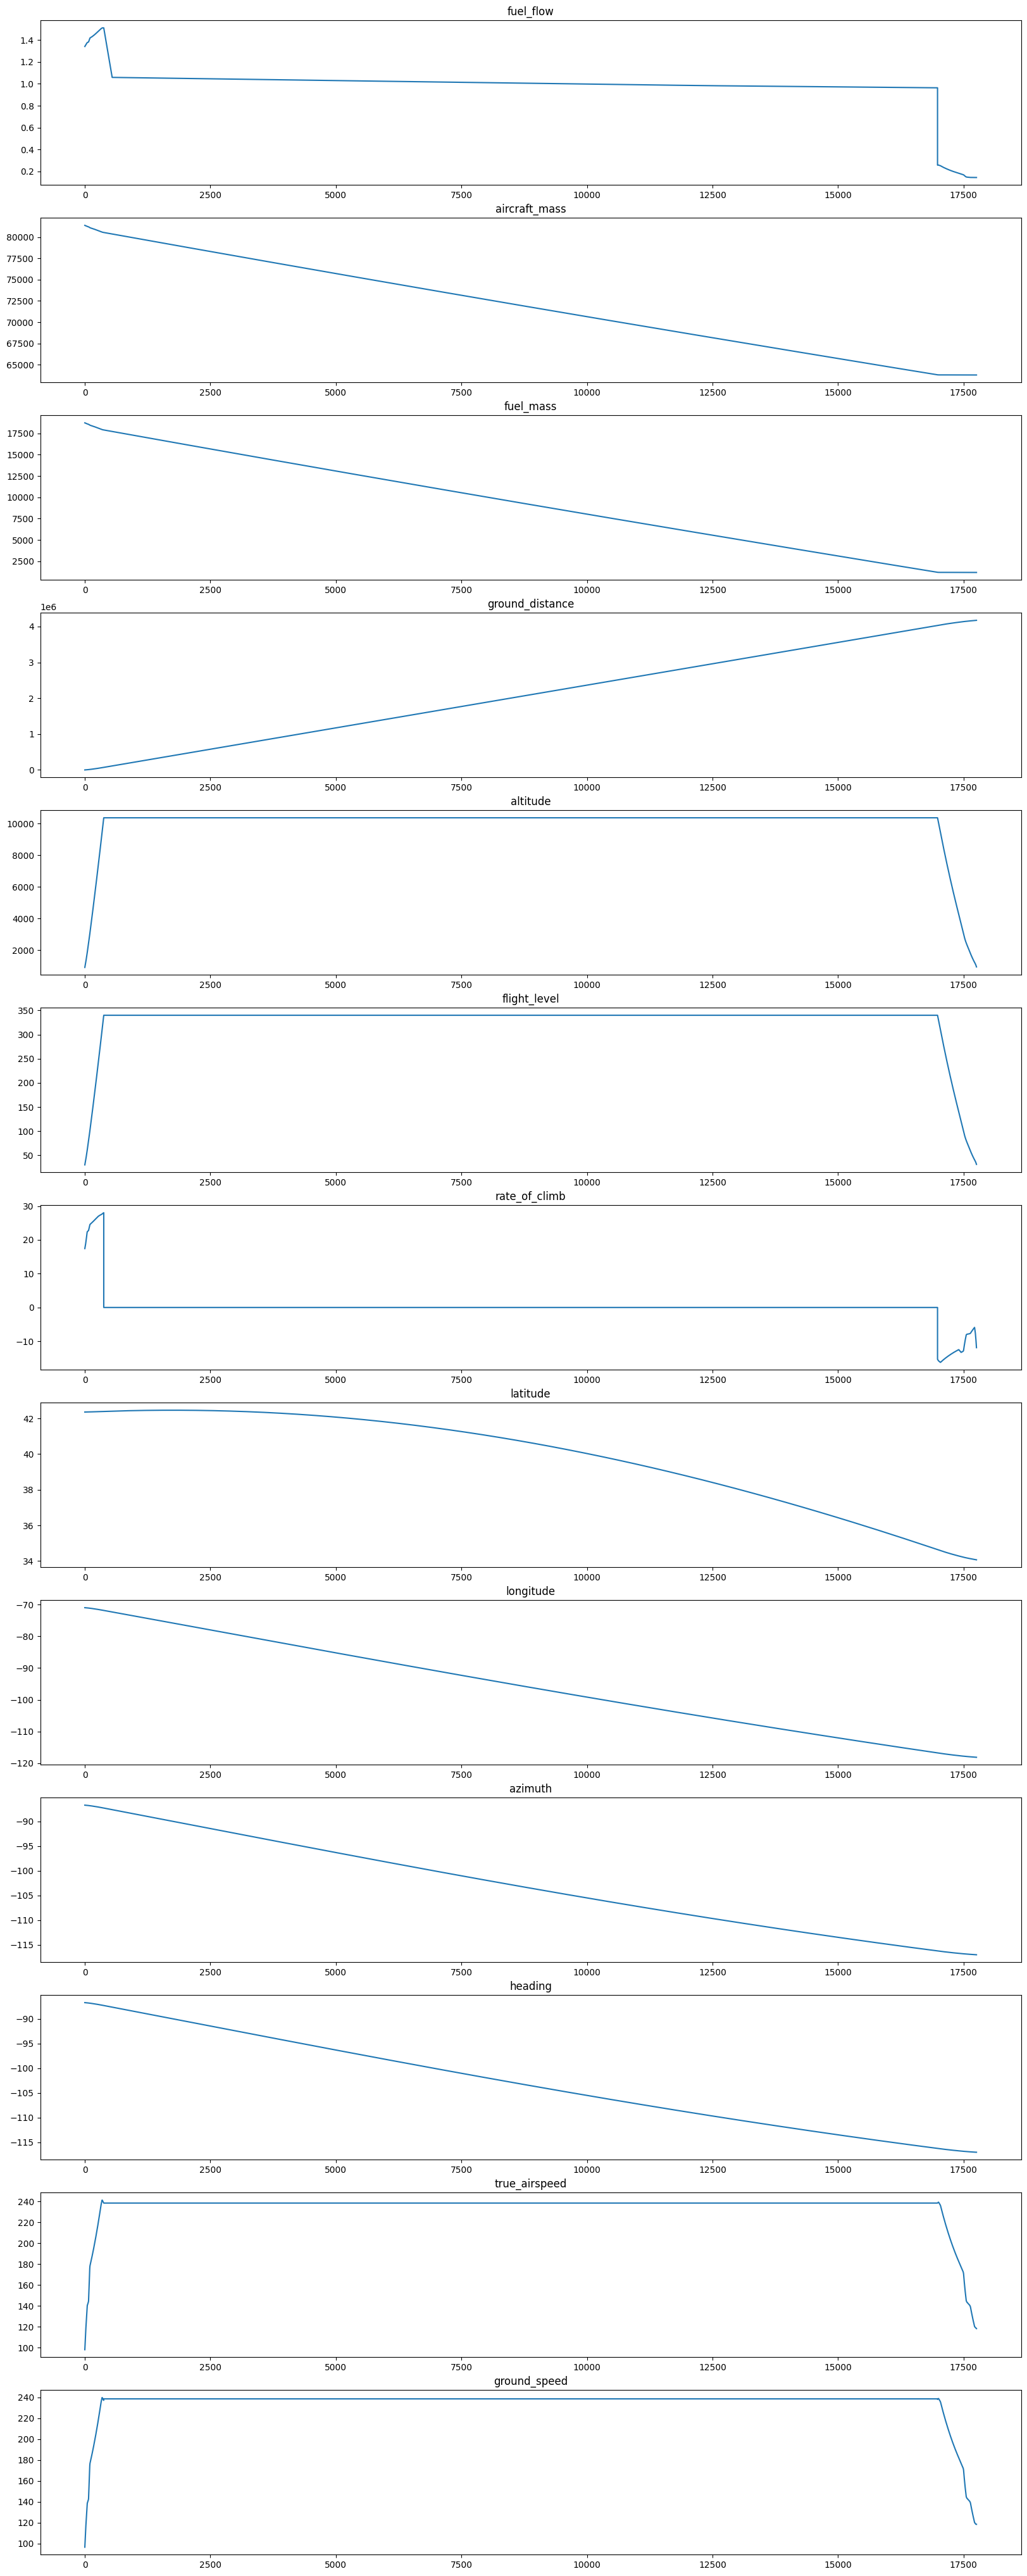

In [8]:
attrs = [
    'fuel_flow',
    'aircraft_mass',
    'fuel_mass',
    'ground_distance',
    'altitude',
    'flight_level',
    'rate_of_climb',
    'latitude',
    'longitude',
    'azimuth',
    'heading',
    'true_airspeed',
    'ground_speed',
]
fig, axs = plt.subplots(len(attrs), 1, figsize=(20, 4 * len(attrs)))
for i, a in enumerate(attrs):
    axs[i].plot(traj.flight_time, getattr(traj, a))
    axs[i].set_title(a)

In [12]:
ts = TrajectoryStore.create(base_file='test_trajectories.nc')

for mis in sample_missions:
    traj = builder.fly(performance_model, mis)
    ts.add(traj)

ts.close()